In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

In [ ]:
data = pd.read_csv('Final predanalysis table.csv')
print(data.shape)
data.head()

(116, 18)


,Countries,Population mil,Population with debit cards,People with debit cards %,Population Ages 15-64,Population Ages 15-64%,Population Ages 65+,Population Ages 65+%,Young working-age popul,Young % of working-age popul,Old working-age popul,Old % of working-age popul,Tourist Arrivals,Income level,Migration (out),Migration (in),Remmitance Inflow,Remmitance Outflow
0,Afghanistan,41.1,1.06860,2.60,22.19,54,0.822,2,42.66,79,0.08,4,NaN,Low income,5.962124,0.144098,300.0,0.0
1,Albania,2.8,11.80000,26.98,22.6,67,6.300,17,16.08,24,4.25,25,2658000.0,Upper middle income,1.360272,0.048810,1970.0,149.0
2,Algeria,44.9,10.26863,22.87,28.287,63,2.694,6,30.87,49,0.60,10,591000.0,Lower middle income,2.000603,0.250378,1770.0,60.0
3,Argentina,46.2,25.35918,54.89,30.03,65,5.544,12,22.75,35,2.16,18,NaN,Upper middle income,1.063859,2.281728,1600.0,590.0
4,Armenia,2.8,11.30000,19.42,23.3,66,11.300,13,20.46,31,2.60,20,375000.0,Upper middle income,0.985961,0.190349,1850.0,605.0


In [ ]:
#Dropping rows with missing values
data = data.dropna()

data.drop(['People with debit cards %', 'Population Ages 15-64%', 'Population Ages 65+%', 'Young % of working-age popul', 'Old % of working-age popul', 'Countries'], axis=1, inplace=True)

data.head()

,Population mil,Population with debit cards,Population Ages 15-64,Population Ages 65+,Young working-age popul,Old working-age popul,Tourist Arrivals,Income level,Migration (out),Migration (in),Remmitance Inflow,Remmitance Outflow
1,2.8,11.80000,22.6,6.300,16.08,4.25,2658000.0,Upper middle income,1.360272,0.048810,1970.0,149.0
2,44.9,10.26863,28.287,2.694,30.87,0.60,591000.0,Lower middle income,2.000603,0.250378,1770.0,60.0
4,2.8,11.30000,23.3,11.300,20.46,2.60,375000.0,Upper middle income,0.985961,0.190349,1850.0,605.0
5,26.0,24.94440,16.9,4.420,18.20,4.42,1828000.0,High income,0.603243,7.653990,1656.0,6546.0
6,9.0,8.59860,5.94,1.800,14.52,6.00,15091000.0,High income,0.505933,1.842426,3000.0,7120.0


In [ ]:
le = LabelEncoder()
data['Income level'] = le.fit_transform(data['Income level'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[-2.81602623e-01, -2.36708585e-01, -1.51589984e-01,
        -4.51560141e-01, -7.19017523e-01,  1.92837835e-01,
        -2.71130051e-01,  1.13855009e+00, -1.87385136e-01,
        -3.69524022e-01, -4.29896079e-01, -3.37076212e-01],
       [-3.83350701e-02, -2.48568323e-01, -1.03259694e-01,
        -6.00435065e-01,  1.06026599e+00, -9.54044541e-01,
        -3.97277034e-01,  3.79516695e-01,  1.16475647e-01,
        -3.39234513e-01, -4.52871396e-01, -3.45690863e-01],
       [-2.81602623e-01, -2.40580849e-01, -1.45641117e-01,
        -2.45133457e-01, -1.92089749e-01, -3.25615842e-01,
        -4.10459302e-01,  1.13855009e+00, -3.65009573e-01,
        -3.48255037e-01, -4.43681270e-01, -2.92938226e-01],
       [-1.47545444e-01, -1.34911411e-01, -2.00030753e-01,
        -5.29176574e-01, -4.63974856e-01,  2.46254274e-01,
        -3.21784137e-01, -1.13855009e+00, -5.46623444e-01,
         7.73302069e-01, -4.65967327e-01,  2.82113911e-01],
       [-2.45776997e-01, -2.61501917e-01, -2.9317300

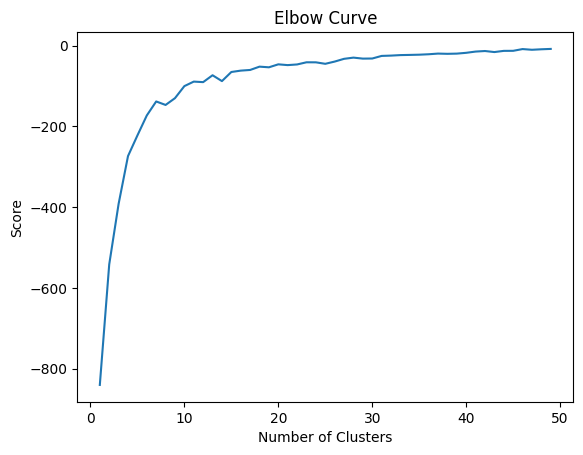

In [ ]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=5, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

In [ ]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=data.columns, index=data.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()

,Population mil,Population with debit cards,Population Ages 15-64,Population Ages 65+,Young working-age popul,Old working-age popul,Tourist Arrivals,Income level,Migration (out),Migration (in),Remmitance Inflow,Remmitance Outflow,cluster
1,-0.281603,-0.236709,-0.151590,-0.451560,-0.719018,0.192838,-0.271130,1.138550,-0.187385,-0.369524,-0.429896,-0.337076,4
2,-0.038335,-0.248568,-0.103260,-0.600435,1.060266,-0.954045,-0.397277,0.379517,0.116476,-0.339235,-0.452871,-0.345691,1
4,-0.281603,-0.240581,-0.145641,-0.245133,-0.192090,-0.325616,-0.410459,1.138550,-0.365010,-0.348255,-0.443681,-0.292938,4
5,-0.147545,-0.134911,-0.200031,-0.529177,-0.463975,0.246254,-0.321784,-1.138550,-0.546623,0.773302,-0.465967,0.282114,3
6,-0.245777,-0.261502,-0.293173,-0.637344,-0.906690,0.742713,0.487644,-1.138550,-0.592801,-0.099998,-0.311573,0.337674,3


In [ ]:
# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [ ]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=data.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,cluster
1,-0.767947,-0.265534,4
2,-0.869014,-1.306290,1
4,-0.836095,-0.764133,4
5,-0.529988,1.280636,3
6,-0.583420,1.752726,3


In [ ]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from pandas.plotting import parallel_coordinates
import seaborn as sns


palette = sns.color_palette("bright", 10)

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:],
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))

            # Display variable names
            if labels is not None:
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig = plt.figure(figsize=(15,7))

            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center')

            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-6,6])
            plt.ylim([-6,6])

            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

def append_class(df, class_name, feature, thresholds, names):
    '''Append a new class feature named 'class_name' based on a threshold split of 'feature'.  Threshold values are in 'thresholds' and class names are in 'names'.'''

    n = pd.cut(df[feature], bins = thresholds, labels=names)
    df[class_name] = n

def plot_dendrogram(Z, names, figsize=(10,25)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    #plt.show()

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''

    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])

    # Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points):
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        # Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)


def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)

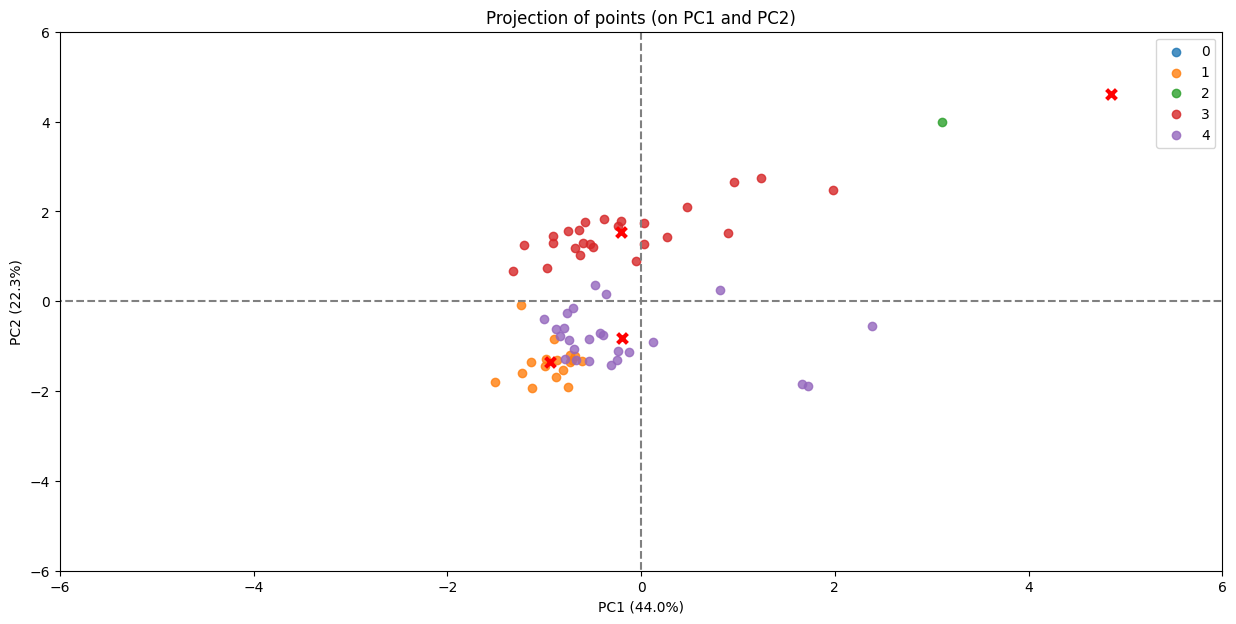

In [ ]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=50, linewidths=3,
            color='r', zorder=10)

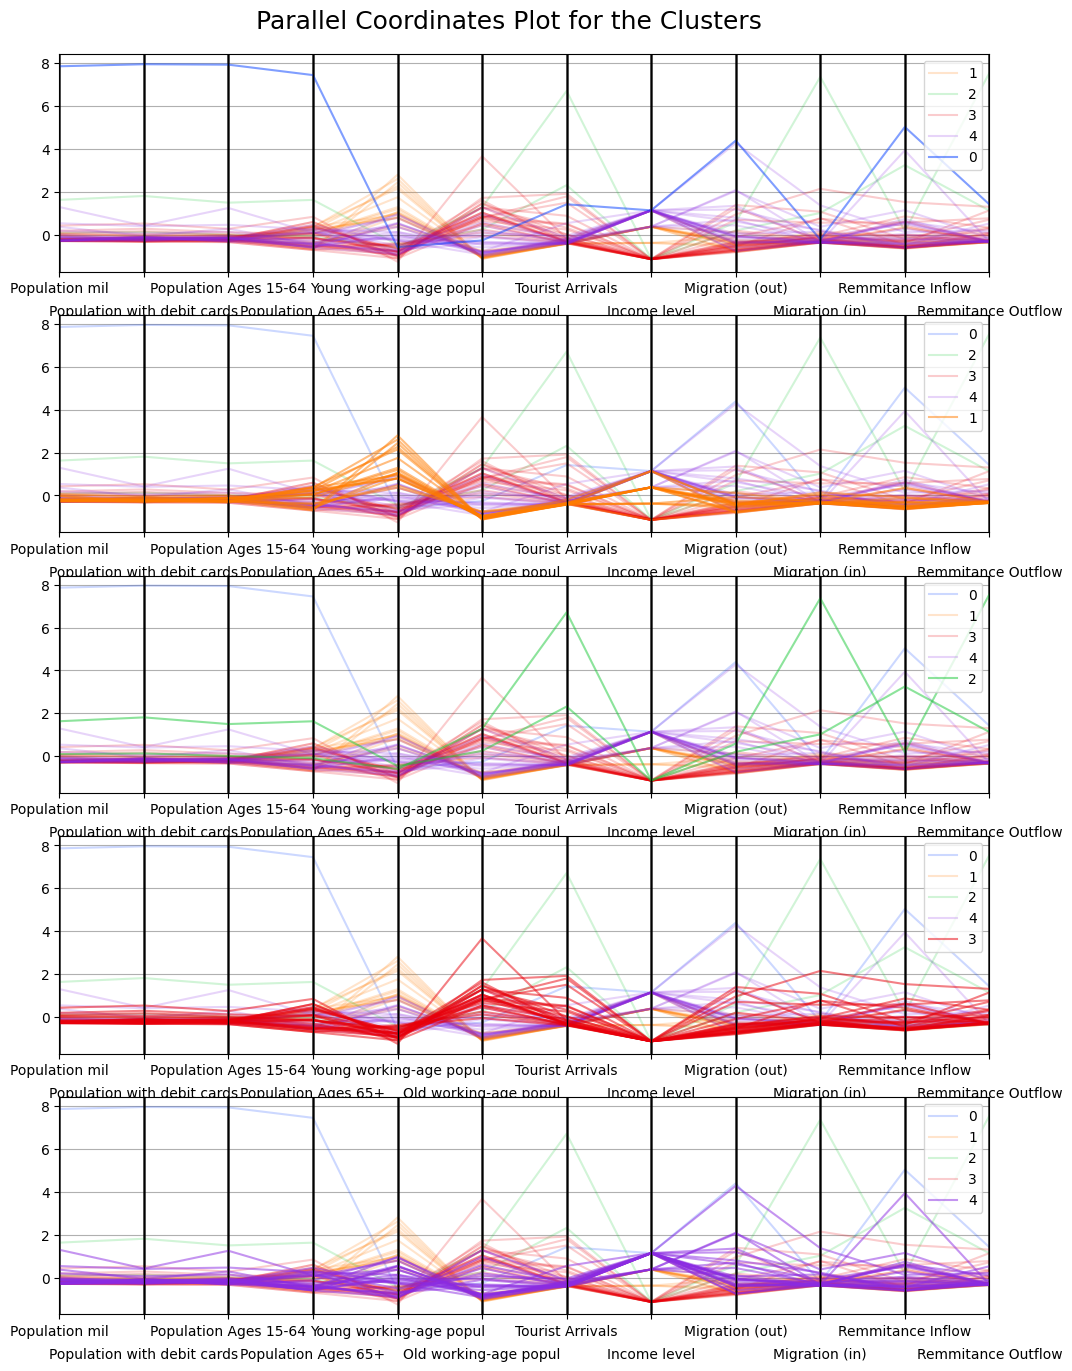

In [ ]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=data.index, columns=data.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 5)

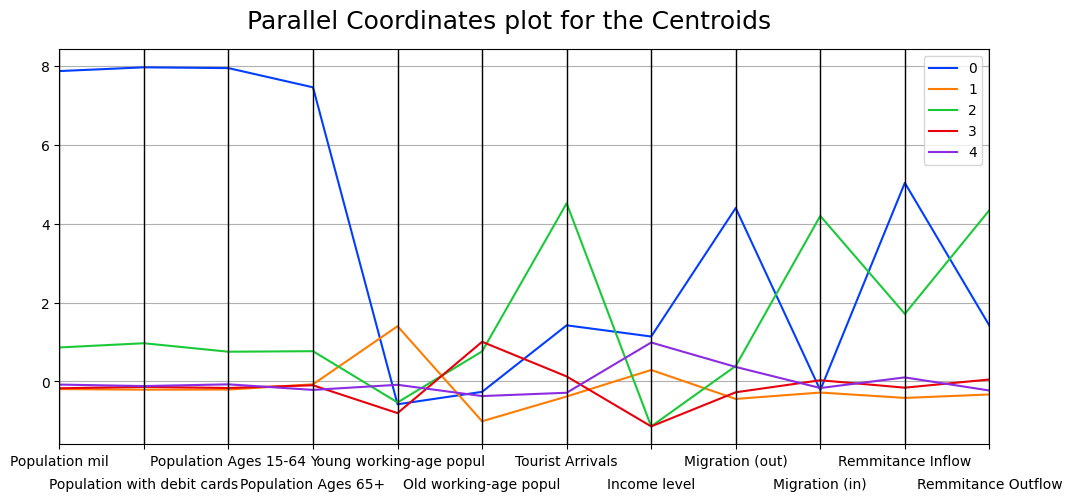

In [ ]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

<Axes: >

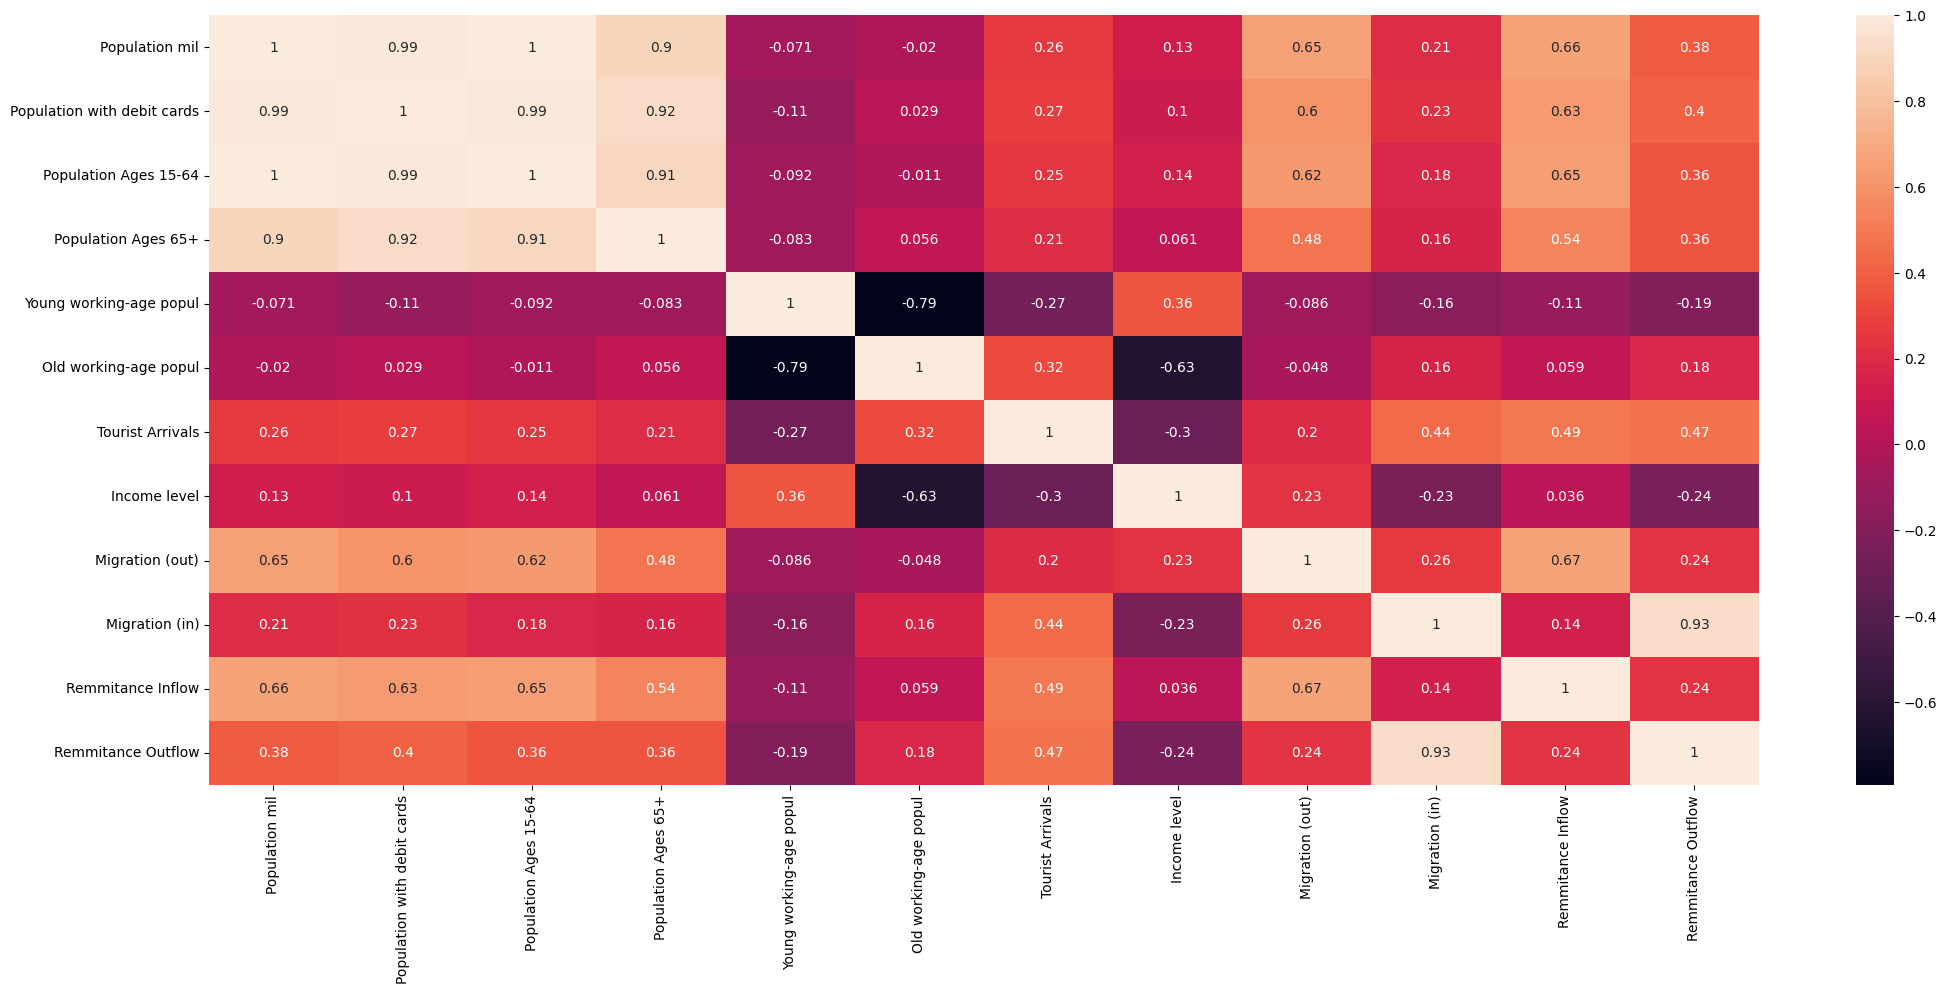

In [ ]:
plt.figure(figsize=(25, 10))
sns.heatmap(data.corr(), annot=True)